In [9]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [10]:
import pickle

In [11]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [14]:
def tokeniser(sentence):
 
    # Remove ||| from kaggle dataset
    sentence = re.sub("[]|||[]", " ", sentence)

    # remove reddit subreddit urls
    sentence = re.sub("/r/[0-9A-Za-z]", "", sentence)

    # remove MBTI types
    MBTI_types = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
              'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ',
              'MBTI']
    MBTI_types = [ti.lower() for ti in MBTI_types] + [ti.lower() + 's' for ti in MBTI_types]

    tokens = nlp(sentence)

    tokens = [ti for ti in tokens if ti.lower_ not in STOP_WORDS]
    tokens = [ti for ti in tokens if not ti.is_space]
    tokens = [ti for ti in tokens if not ti.is_punct]
    tokens = [ti for ti in tokens if not ti.like_num]
    tokens = [ti for ti in tokens if not ti.like_url]
    tokens = [ti for ti in tokens if not ti.like_email]
    tokens = [ti for ti in tokens if ti.lower_ not in MBTI_types]


    # lemmatize
    tokens = [ti.lemma_ for ti in tokens if ti.lemma_ not in STOP_WORDS]
    tokens = [ti for ti in tokens if len(ti) > 1]

    return tokens

In [15]:
dummy_fn = lambda x:x

In [16]:
with open('./pickle files/cv.pickle', 'rb') as f:
    cv = pickle.load(f)

In [17]:
with open('./pickle files/idf_transformer.pickle', 'rb') as f:
    idf_transformer = pickle.load(f)

In [18]:
# loading the pickle files with the classifiers
with open('./pickle files/LR_clf_IE_kaggle.pickle', 'rb') as f:
    lr_ie = pickle.load(f)
with open('./pickle files/LR_clf_JP_kaggle.pickle', 'rb') as f:
    lr_jp = pickle.load(f)
with open('./pickle files/LR_clf_NS_kaggle.pickle', 'rb') as f:
    lr_ns = pickle.load(f)
with open('./pickle files/LR_clf_TF_kaggle.pickle', 'rb') as f:
    lr_tf = pickle.load(f)

In [19]:
# creating the functions to predict the personality types
def predict_EI(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'E': lr_ie.predict_proba(x)[0][0], 'I': lr_ie.predict_proba(x)[0][1]}

def predict_JP(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'J': lr_jp.predict_proba(x)[0][1], 'P': lr_jp.predict_proba(x)[0][0]}

def predict_NS(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'N': lr_ns.predict_proba(x)[0][1], 'S': lr_ns.predict_proba(x)[0][0]}

def predict_TF(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'T': lr_tf.predict_proba(x)[0][1], 'F': lr_tf.predict_proba(x)[0][0]}

In [20]:
parameters = {}

## Displaying the Results

In [21]:
from IPython.display import display
import ipywidgets as widgets

In [22]:
plt.style.use(['ggplot'])

In [24]:
output_text = widgets.Text()

In [25]:
input_text = widgets.Text(description='Description:', disabled=False)

def bind_input_to_output(sender):
    output_text.value = input_text.value
    
input_text.on_submit(bind_input_to_output)
input_text

Text(value='', description='Description:')

In [28]:
output_text.value

'This is brilliant yeh'

Button(description='Evaluate', style=ButtonStyle())

Output()

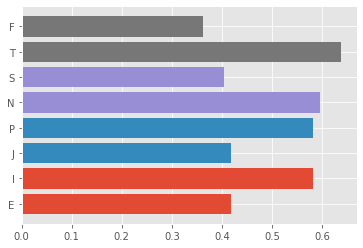

In [29]:
button = widgets.Button(description="Evaluate")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Evaluations")
        
        about = output_text.value
        
        plt.barh(*zip(*predict_EI(about).items()))
        plt.barh(*zip(*predict_JP(about).items()))
        plt.barh(*zip(*predict_NS(about).items()))
        plt.barh(*zip(*predict_TF(about).items()))

button.on_click(on_button_clicked)